#**TEMA: TEKNOLOJİDE TOPLUMSAL CİNSİYET EŞİTLİĞİ** 🌍⚖️


---

**PROJE BAŞLIĞI**

**👩‍💻TEKNOLOJİDE CİNSİYET EŞİTLİĞİ: CİNSİYETLERE GÖRE MAAŞ FARKLILIKLARININ ANALİZİ👨‍💻**


**PROJE AMACI** 🎯
*   Bu veri bilimi projesi, cinsiyetler arasındaki maaş farklılıklarını analiz etmek ve toplumsal cinsiyet eşitsizliğini anlamak amacıyla kullanılacaktır.

**GENEL ARAŞTIRMA SORULARI**

* Kadın ve erkek çalışanlar arasında belirli maaş farklılıkları var mı?
* Cinsiyet, temel ücret üzerinde nasıl bir etkiye sahiptir?
* Performans değerlendirmesi ve eğitim düzeyi gibi faktörler cinsiyetler arası maaş farklarını etkiliyor mu?

**VERİ SETİ**📊

Glassdoor Gender Pay Gap veri seti, Glassdoor web sitesinden alınmıştır. Glassdoor, işverenlerin ve çalışanların maaş bilgilerini, iş değerlendirmelerini ve şirket incelemelerini paylaştığı bir platformdur.

* Cinsiyetler arası maaş farklılıklarının yanı sıra, yaş, eğitim ve kıdem gibi faktörlerin maaş üzerindeki etkileri de analiz edilecektir.

Veri Setinin İçeriği:

* İş Unvanı (JobTitle): Çalışanların iş pozisyonları.
* Cinsiyet (Gender): Çalışanın cinsiyeti (Kadın/Erkek).
* Yaş (Age): Çalışanın yaşı.
* Performans Değerlendirmesi (PerfEval): Çalışanın performans değerlendirmesi.(1-5)
* Eğitim (Education): Çalışanın eğitim durumu.
* Departman (Dept): Çalışanın çalıştığı departman.
* Kıdem (Seniority): Çalışanın işteki kıdemi.(1-5)
* Temel Maaş (Base Pay): Çalışanın yıllık temel maaşı.
* Prim(Bonus):Şirketin kârı veya yıllık performansı üzerinden verilen ek ödeme.

KAYNAK: https://www.kaggle.com/code/konoam/gender-pay-gap-analysis-glassdor-dfset


##**KÜTÜPHANELERİN KURULUMU VE VERİ SETİNİN OKUNMASI** 📚

In [ ]:
# Veri Manipülasyonu ve Analizi
import pandas as pd
import numpy as np

# Görselleştirme
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.figure_factory as ff

# Makine Öğrenimi
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
import xgboost as xgb
import lightgbm as lgb
!pip install -q catboost  # catboost indirme işlemi (google colab sisteminde catboost bulundurmamakta)
from catboost import CatBoostRegressor

# İstatistiksel işlemler
import statsmodels.formula.api as sm
from statsmodels.stats.anova import anova_lm


# Hata uyarılarını kapatma
import warnings
warnings.simplefilter(action='ignore', category=Warning)

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
#Glassdoor Gender Pay Gap veri setinin okunması
data = pd.read_csv('/content/Glassdoor Gender Pay Gap.csv')

In [ ]:
pd.set_option('display.float_format', '{:,.2f}'.format) #sayıların okunaklı hale getirilme işlemi

##**VERİ SETİNE İLK BAKIŞ**🔍

In [ ]:
data.columns

Index(['JobTitle', 'Gender', 'Age', 'PerfEval', 'Education', 'Dept',
       'Seniority', 'BasePay', 'Bonus'],
      dtype='object')

In [ ]:
def veri_on_sorgu(data):
    # Veri setinin boyutu
    display("Veri setinin boyutu:", data.shape)
    print() #boş satır

    # İlk 5 satır
    display("Veri setinin ilk 5 satırı:", data.head())
    print()

    # Son 5 satır
    display("Veri setinin son 5 satırı:", data.tail())
    print()

    # Genel bilgiler
    display("Veri setinin bilgileri:")
    display(data.info())
    print()

    # Temel istatistikler
    display("Temel İstatistikler:", data.describe().T)
    print()

    # Eşsiz değer sayıları
    for column in data.columns:
        unique_values = data[column].nunique()
        display(f"{column} sütunundaki eşsiz değer sayısı: {unique_values}")

veri_on_sorgu(data)

'Veri setinin boyutu:'

(1000, 9)

'Veri setinin ilk 5 satırı:'

,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus
0,Graphic Designer,Female,18,5,College,Operations,2,42363,9938
1,Software Engineer,Male,21,5,College,Management,5,108476,11128
2,Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268
3,Software Engineer,Male,20,5,Masters,Sales,4,108080,10154
4,Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319


'Veri setinin son 5 satırı:'

,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus
995,Marketing Associate,Female,61,1,High School,Administration,1,62644,3270
996,Data Scientist,Male,57,1,Masters,Sales,2,108977,3567
997,Financial Analyst,Male,48,1,High School,Operations,1,92347,2724
998,Financial Analyst,Male,65,2,High School,Administration,1,97376,2225
999,Financial Analyst,Male,60,1,PhD,Sales,2,123108,2244


'Veri setinin bilgileri:'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   JobTitle   1000 non-null   object
 1   Gender     1000 non-null   object
 2   Age        1000 non-null   int64 
 3   PerfEval   1000 non-null   int64 
 4   Education  1000 non-null   object
 5   Dept       1000 non-null   object
 6   Seniority  1000 non-null   int64 
 7   BasePay    1000 non-null   int64 
 8   Bonus      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


None

'Temel İstatistikler:'

,count,mean,std,min,25%,50%,75%,max
Age,"1,000.00",41.39,14.29,18.00,29.00,41.00,54.25,65.00
PerfEval,"1,000.00",3.04,1.42,1.00,2.00,3.00,4.00,5.00
Seniority,"1,000.00",2.97,1.40,1.00,2.00,3.00,4.00,5.00
BasePay,"1,000.00","94,472.65","25,337.49","34,208.00","76,850.25","93,327.50","111,558.00","179,726.00"
Bonus,"1,000.00","6,467.16","2,004.38","1,703.00","4,849.50","6,507.00","8,026.00","11,293.00"


'JobTitle sütunundaki eşsiz değer sayısı: 10'

'Gender sütunundaki eşsiz değer sayısı: 2'

'Age sütunundaki eşsiz değer sayısı: 48'

'PerfEval sütunundaki eşsiz değer sayısı: 5'

'Education sütunundaki eşsiz değer sayısı: 4'

'Dept sütunundaki eşsiz değer sayısı: 5'

'Seniority sütunundaki eşsiz değer sayısı: 5'

'BasePay sütunundaki eşsiz değer sayısı: 992'

'Bonus sütunundaki eşsiz değer sayısı: 941'

❗ Maaşlar 34,208 - 179,726 dolar arasında olup, ortalama 94, medyan 93'tür. Bu, maaşların ortalamaya yakın olduğunu gösterir. Ancak 34,208 gibi düşük maaş, olası bir aykırı değerdir.

❗ Prim Analizi: Primler 1 - 11 arasında, ortalama ve medyan 6’dır. Dağılım simetrik görünse de, en düşük prim (1) aykırı bir değer olabilir.



##**VERİ ÖN İŞLEME VE AYKIRI DEĞER TESPİTİ** 🧹

In [ ]:
data.isnull().sum() #Boş değerlerin sayısı

,0
JobTitle,0
Gender,0
Age,0
PerfEval,0
Education,0
Dept,0
Seniority,0
BasePay,0
Bonus,0


Eksik değer yoktur.



In [ ]:
#AYKIRI DEĞER TESPİTİNİN GÖRSELLEŞTİRİLMESİ

# Yan yana grafik oluşturma
fig = make_subplots(rows=1, cols=2, subplot_titles=("Temel Maaş Aykırı Değerleri", "Prim Aykırı Değerleri"))

# Temel Maaş kutu grafiği
fig.add_trace(go.Box(y=data['BasePay'], name='Temel Maaş', marker_color='blue'),
              row=1, col=1)

# Bonus kutu grafiği
fig.add_trace(go.Box(y=data['Bonus'], name='Bonus', marker_color='orange'),
              row=1, col=2)

# Genel ayarlar
fig.update_layout(title_text="Aykırı Değer Analizi",
                  height=400,
                  width=1000,
                  showlegend=False)
fig.show()

In [ ]:
#AYKIRI DEĞERLERİ ÇEYREKLER ARASI ARALIK IQR (interquartile range) YÖNTEMİYLE TESPİT ETME

Q1 = data['BasePay'].quantile(0.25)
Q3 = data['BasePay'].quantile(0.75)
IQR = Q3 - Q1

# Aykırı değer sınırları
alt_sinir = Q1 - 1.5 * IQR
ust_sinir = Q3 + 1.5 * IQR

# Aykırı değerleri gösterme
aykiri_degerler = data[(data['BasePay'] < alt_sinir) | (data['BasePay'] > ust_sinir)]
print("Aykırı Değerler:")
print(aykiri_degerler)

Aykırı Değerler:
    JobTitle Gender  Age  PerfEval Education        Dept  Seniority  BasePay  \
353  Manager   Male   59         4       PhD       Sales          5   176789   
609       IT   Male   65         4   Masters       Sales          5   165229   
927  Manager   Male   58         1       PhD  Management          4   179726   

     Bonus  
353   6773  
609   6506  
927   4284  


In [ ]:
# Medyan Hesaplama
medyan = data['BasePay'].median()

# Aykırı değerlerin medyan ile değiştirilmesi
data.loc[data['BasePay'] < alt_sinir, 'BasePay'] = medyan
data.loc[data['BasePay'] > ust_sinir, 'BasePay'] = medyan

# Temizlenmiş veri setinin temel istatistiklerinin kontrol edilmesi
print("\nAykırı Değerler Medyan ile Değiştirildikten Sonra Temizlenmiş Veri:")
print(data.describe())


Aykırı Değerler Medyan ile Değiştirildikten Sonra Temizlenmiş Veri:
           Age  PerfEval  Seniority    BasePay     Bonus
count 1,000.00  1,000.00   1,000.00   1,000.00  1,000.00
mean     41.39      3.04       2.97  94,230.89  6,467.16
std      14.29      1.42       1.40  24,957.25  2,004.38
min      18.00      1.00       1.00  34,208.00  1,703.00
25%      29.00      2.00       2.00  76,850.25  4,849.50
50%      41.00      3.00       3.00  93,323.75  6,507.00
75%      54.25      4.00       4.00 111,175.50  8,026.00
max      65.00      5.00       5.00 163,208.00 11,293.00


##**EŞSİZ DEĞERLER** 📝

In [ ]:
data['JobTitle'].unique() #İş unvanı sütunundaki eşsiz değerler

array(['Graphic Designer', 'Software Engineer', 'Warehouse Associate',
       'IT', 'Sales Associate', 'Driver', 'Financial Analyst',
       'Marketing Associate', 'Data Scientist', 'Manager'], dtype=object)

In [ ]:
print(data['JobTitle'].value_counts()) #İş unvanı sütunundaki değerlerin (çalışan) sayısı

JobTitle
Marketing Associate    118
Software Engineer      109
Financial Analyst      107
Data Scientist         107
Graphic Designer        98
IT                      96
Sales Associate         94
Driver                  91
Warehouse Associate     90
Manager                 90
Name: count, dtype: int64


In [ ]:
print(data['Gender'].value_counts()) #Cinsiyet sütunundaki değerlerin (çalışan) sayısı

Gender
Male      532
Female    468
Name: count, dtype: int64


In [ ]:
print(data['Education'].value_counts()) #Egitim sütunundaki değerlerin sayısı

Education
High School    265
Masters        256
College        241
PhD            238
Name: count, dtype: int64


In [ ]:
data['Dept'].unique() #Departman sütunundaki eşsiz değerler

array(['Operations', 'Management', 'Administration', 'Sales',
       'Engineering'], dtype=object)

In [ ]:
print(data['Seniority'].value_counts()) #Kıdem sütunundaki değerlerin sayısı

Seniority
3    219
2    209
1    195
5    193
4    184
Name: count, dtype: int64


##**VERİ ANALİZİ VE GÖRSELLEŞTİRME** 📊



### **Cinsiyet Maaş ilişkisi**

In [ ]:
gender_basePay_stats = data.groupby('Gender')['BasePay'].agg(['min', 'max'])

# Sonuçların gösterilmesi
print(f'Cinsiyete göre temel maaş min max değerleri :\n{gender_basePay_stats}')

Cinsiyete göre temel maaş min max değerleri :
             min        max
Gender                     
Female 34,208.00 160,614.00
Male   36,642.00 163,208.00


### **Minimum ve Maksimum Ücret Alan Çalışanların İş Unvanı ve Departman Bilgisi**


In [ ]:
# Minimum ve maksimum değerlerin ilgili departman ve unvan bilgileriyle birleştirilmesi
min_details = pd.merge(data, gender_basePay_stats, left_on=['BasePay'], right_on=['min'], how='inner')
max_details = pd.merge(data, gender_basePay_stats, left_on=['BasePay'], right_on=['max'], how='inner')

# min ve max birleştirme
min_max_details = pd.concat([min_details, max_details])

# Her cinsiyet için bir çıktı
for index, row in min_max_details.iterrows():
    value_type = "Min" if row['BasePay'] == row['min'] else "Max"
    print(f"{row['Gender']} - {row['JobTitle']} ({row['Dept']}) - {value_type}")

Female - Marketing Associate (Engineering) - Min
Male - Graphic Designer (Operations) - Min
Female - Manager (Management) - Max
Male - Manager (Management) - Max


In [ ]:
# Cinsiyete göre ortalama maaşlar
average_base_pay_by_gender = data.groupby('Gender')['BasePay'].mean()

print(f'Cinsiyete göre ortalama Temel Maaş değerleri :\n{average_base_pay_by_gender}')

Cinsiyete göre ortalama Temel Maaş değerleri :
Gender
Female   89,942.82
Male     98,003.11
Name: BasePay, dtype: float64


In [ ]:
fig_BasePay_plot = px.box(
    data,
    x="Gender",
    y="BasePay",
    title='<b>Cinsiyete Göre Temel Maaş Karşılaştırması</b>',
    width=1000,
    labels={"Gender": "<b>Cinsiyet</b>", "BasePay": "<b>Maaş</b>"},
    color="Gender",  # Cinsiyete göre renklendirme
    color_discrete_map={"Male": "skyblue", "Female": "indigo"},
    template="plotly_dark",  # Renk eşleme
)

# Cinsiyet isimlerinin Türkçe olarak güncellenmesi
fig_BasePay_plot.update_layout(
    xaxis_title_text="Cinsiyet",
    xaxis=dict(
        tickmode='array',
        tickvals=['Male', 'Female'],  # Mevcut değerler
        ticktext=['Erkek', 'Kadın']  # Türkçe karşılıkları
    )
)
fig_BasePay_plot.for_each_trace(lambda trace: trace.update(name={'Male': 'Erkek', 'Female': 'Kadın'}.get(trace.name, trace.name)))

fig_BasePay_plot.show()

### **Cinsiyet Bonus (Prim) İlişkisi**

In [ ]:
# Cinsiyete göre maksimum ve minimum Bonus değerleri
gender_bonus_stats = data.groupby('Gender')['Bonus'].agg(['min', 'max'])

# Sonuçların gösterilmesi
print(f'Cinsiyete göre Bonus min max değerleri :\n{gender_bonus_stats}')

Cinsiyete göre Bonus min max değerleri :
         min    max
Gender             
Female  1884  10768
Male    1703  11293


In [ ]:
# Cinsiyete göre ortalama Bonus
average_bonus_pay_by_gender = data.groupby('Gender')['Bonus'].mean()

print(f'Cinsiyete göre ortalama bonus değerleri :\n{average_bonus_pay_by_gender}')

Cinsiyete göre ortalama bonus değerleri :
Gender
Female   6,474.01
Male     6,461.13
Name: Bonus, dtype: float64


In [ ]:
fig_Bonus_plot = px.box(data, x='Gender', y='Bonus',
             title='<b>Cinsiyete Göre Bonus Karşılaştırması</b>',
             width=1000,
             color="Gender",
             color_discrete_map={"Male": "skyblue", "Female": "indigo"},
             template="plotly_dark",
             labels={'Gender': '<b>Cinsiyet</b>', 'Bonus': '<b>Prim</b>'})

# Cinsiyet isimlerinin Türkçe olarak güncellenmesi
fig_Bonus_plot.update_layout(
    xaxis_title_text="Cinsiyet",
    xaxis=dict(
        tickmode='array',
        tickvals=['Male', 'Female'],  # Mevcut değerler
        ticktext=['Erkek', 'Kadın']  # Türkçe karşılıkları
    )
)
fig_Bonus_plot.for_each_trace(lambda trace: trace.update(name={'Male': 'Erkek', 'Female': 'Kadın'}.get(trace.name, trace.name)))

fig_Bonus_plot.show()

### **Yaş, Kıdem ve Maaş İlişkisi**

In [ ]:
# Verilern DataFrame'e dönüştürülmesi
fig_age_seniority_salary = px.scatter_3d(data, x='Age', y='Seniority', z='BasePay',
              color='BasePay', color_continuous_scale='dense', template="plotly_dark")
fig_age_seniority_salary.update_traces(marker=dict(size=3))

# Beyaz alanı azaltma ve genişliği belirleme
fig_age_seniority_salary.update_layout(margin=dict(l=0, r=0, b=0, t=50),
                  width=1000,
                  title_text="Yaş, Kıdem ve Maaş İlişkisi")
fig_age_seniority_salary.show()

### **Kıdemi En Yüksek Yazılım Mühendislerinin Cinsiyete Göre Temel Maaş Analizi**

In [ ]:
# Yazılım mühendislerini filtreleme
software_engineers = data[data['JobTitle'] == 'Software Engineer']

# Kıdem düzeyine göre gruplama ve cinsiyete göre temel maaşların ortalamasını alma
high_seniority = software_engineers[software_engineers['Seniority'] == software_engineers['Seniority'].max()]
salary_by_gender = high_seniority.groupby('Gender')['BasePay'].mean().reset_index()

# Sonuçları yazdırma
print("Kıdemi En Yüksek Yazılım Mühendislerinin Cinsiyete Göre Temel Maaş Analizi:")
print(salary_by_gender)

Kıdemi En Yüksek Yazılım Mühendislerinin Cinsiyete Göre Temel Maaş Analizi:
   Gender    BasePay
0  Female 112,491.00
1    Male 130,115.90


### **Cinsiyete Göre İş Ünvanı Dağılımı**

In [ ]:
gender_jobtitle = data.groupby(['Gender', 'JobTitle']).size().unstack()

# Bar grafiği
fig_jobBar_gender = px.bar(gender_jobtitle, barmode='group',
             width=1200,
             labels={'value': '<b>Çalışan Sayısı</b>', 'JobTitle': '<b>İş Unvanı</b>', 'Gender': '<b>Cinsiyet</b>'},
             title='<b>Cinsiyete Göre İş Ünvan Dağılımı</b>',
             template='plotly_dark',
             color_discrete_map={  # Cinsiyetlere özel renkler
        "Male": "blue",
        "Female": "pink"
    }
)
fig_jobBar_gender.update_xaxes(ticktext=["Kadın", "Erkek"], tickvals=["Female", "Male"])

fig_jobBar_gender.show()

### **Departmana Göre Cinsiyet Dağılımı**

In [ ]:
count_data = data.groupby(['Gender', 'Dept']).size().reset_index(name='Count')
Dept_class_order = ['Operations', 'Management', 'Administration', 'Sales',
       'Engineering'][::-1]
count_data['Dept'] = pd.Categorical(count_data['Dept'], categories=Dept_class_order)
count_data.sort_values(by = ['Dept','Gender'], inplace=True)
count_data.reset_index(drop=True, inplace=True)

fig = px.bar(count_data, y='Dept', x='Count', color='Gender', barmode='stack', template='plotly_dark', color_discrete_map={'Male': 'powderblue', 'Female': 'Purple'},labels= {"Dept": "Departman", "Gender": "Cinsiyet"})
fig.update_layout(yaxis_title='Dept', xaxis_title='Count', title='Departmana Göre Cinsiyet Dağılımı',width=1000)
fig.show()

### **Cinsiyet Bazında Kıdeme Göre Maaş Dağılımı**

In [ ]:
fig = px.violin(data, x="Seniority", y="BasePay", color="Gender",
                box=True, points="all", # Kutu grafiği ve veri noktalarının gösterilmesi
                title="Cinsiyet Bazında Kıdeme Göre Maaş Dağılımı",
                color_discrete_sequence=["#9467bd","#17becf"],
                template="plotly_dark",
                width=1000,
                labels={"Seniority": "Kıdem (Yıl)", "BasePay": "Maaş", "Gender": "Cinsiyet"})
fig.show()

### **Cinsiyete Göre Yüksek Temel Maaş**:

In [ ]:
# 100.000 dolardan fazla kazanan kadın ve erkeklerin oranlarının hesaplanması
high_earners = data[data['BasePay'] > 100000]
gender_ratios = high_earners.groupby('Gender')['BasePay'].count() / len(high_earners) * 100

# Sonuçlar
gender_ratios_df = pd.DataFrame(gender_ratios).T  # Sütunu transpoze etme
gender_ratios_df.index = ['Temel Maaş Oranları']  # İndex ismi
gender_ratios_df = gender_ratios_df.rename_axis(None, axis=1)
gender_ratios_df.columns.name = 'Cinsiyet'  # Sütun ismi

print("Yüksek Maaşlı Kadın ve Erkek Oranları:")
gender_ratios_df

Yüksek Maaşlı Kadın ve Erkek Oranları:


Cinsiyet,Female,Male
Temel Maaş Oranları,39.47,60.53


In [ ]:
fig_high_earners_pie = go.Figure(data=[go.Pie(labels=gender_ratios.index, values=gender_ratios)])
fig_high_earners_pie.update_traces(
    hoverinfo='label+percent',
    textinfo='percent+label',
    texttemplate="<b>%{percent}</b><br>%{label}",
    marker=dict(colors=["indigo", "skyblue"])
)
fig_high_earners_pie.update_layout(
    title='100.000 Dolardan Fazla Kazanan Kadın ve Erkeklerin Oranı',
    width=800,
    template='plotly_dark'
)
fig_high_earners_pie.update_traces(labels=['Kadın', 'Erkek'])
fig_high_earners_pie.show()

In [ ]:
# yüksek maaşlıların tanımlanması ve ortalamalarının alınması
high_earners = data[data['BasePay'] > 100000]
average_salary_by_gender = high_earners.groupby('Gender')['BasePay'].mean()

# Maaş farkını hesaplama
salary_difference = average_salary_by_gender['Male'] - average_salary_by_gender['Female']

print(f"Yüksek gelirli erkekler ve kadınlar arasındaki ortalama yıllık maaş farkı.: {salary_difference} dolardır.")

Yüksek gelirli erkekler ve kadınlar arasındaki ortalama yıllık maaş farkı.: 3160.1735950920265 dolardır.


###**Yüksek Temel Maaşlı Erkek ve Kadınların Performansa Göre Temel Maaş İlişkisi**

In [ ]:
# Yüksek temel maaşlı çalışanların filtrelenmesi (100.000)
high_earners = data[data['BasePay'] > 100000]

# Performans değerlendirmesi ve cinsiyete göre temel maaş dağılımının grafiği
fig = px.scatter(
    high_earners,
    x='PerfEval',
    y='BasePay',
    color='Gender',
    title='Yüksek Temel Maaşlı Çalışanların Performans Değerlendirmesi ve Temel Maaş İlişkisi',
    labels={'PerfEval': 'Performans Değerlendirmesi', 'BasePay': 'Temel Maaş'},
    color_discrete_map={"Male": "skyblue", "Female": "indigo"},
    width=1000,
    template="plotly_dark"
)

fig.show()

### **Cinsiyete Göre Performans ve Temel Maaş Değerlendirmesi**

In [ ]:
# Cinsiyet ve performans değerlendirmesine göre temel maaş ortalamalarını hesaplama
performance_salary = data.groupby(['Gender', 'PerfEval'])['BasePay'].mean().reset_index()

# Performans değerlendirmesine göre temel maaş ortalamalarının grafiği
fig_performance_salary = px.bar(
    performance_salary,
    x='PerfEval',
    y='BasePay',
    color='Gender',
    barmode='group',
    title='Cinsiyet ve Performans Değerlendirmesine Göre Ortalama Temel Maaş',
    labels={'PerfEval': 'Performans Değerlendirmesi', 'BasePay': 'Ortalama Temel Maaş'},
    color_discrete_map={"Male": "skyblue", "Female": "indigo"},
    width=1000,
    template="plotly_dark"
)

fig_performance_salary.show()

### **Cinsiyete Göre Temel Maaş ve Prim İlişkisi**

In [ ]:
fig_gender_pay_bonus_2D = px.scatter(data, x="BasePay", y="Bonus", color="Gender",
                 title="Cinsiyete Göre Temel Maaş ve Bonus İlişkisi",
                 width=1000,
                 color_discrete_sequence=["#9467bd","#17becf"],
                 template="plotly_dark",
                 labels={"BasePay": "Temel Maaş", "Bonus": "Bonus", "Gender": "Cinsiyet"})
fig_gender_pay_bonus_2D.show()

❗ Temel Maaş ve Bonus arasında pozitif bir ilişki vardır ancak kadın ve erkekler arasında bariz bir fark görülmemektedir.

### **Toplam Maaş Analizi**

In [ ]:
# Toplam maaşı hesaplama
temp_total_salary = data['BasePay'] + data['Bonus']

# En yüksek ve en düşük toplam maaş değerine sahip satırlar
highest_lowest_salary = data[
    (temp_total_salary == max(temp_total_salary)) | (temp_total_salary == min(temp_total_salary))
]

# Toplam maaşı geçici tabloya ekleme
highest_lowest_salary = highest_lowest_salary.copy()
highest_lowest_salary['Total_salary'] = temp_total_salary[
    (temp_total_salary == max(temp_total_salary)) | (temp_total_salary == min(temp_total_salary))
]

# Sonuçları görüntüleme
print(f"En yüksek ve En düşük Total Maaşlara Ait ilgili satırlar: \n {highest_lowest_salary}")

En yüksek ve En düşük Total Maaşlara Ait ilgili satırlar: 
                 JobTitle  Gender  Age  PerfEval    Education         Dept  \
357              Manager  Female   60         4          PhD   Management   
465  Marketing Associate  Female   18         3  High School  Engineering   

     Seniority    BasePay  Bonus  Total_salary  
357          3 160,614.00   8354    168,968.00  
465          2  34,208.00   6620     40,828.00  


❗ Veri setinde en yüksek maaş 168,968 dolar ile bir kadın yöneticiye, en düşük maaş ise 40,828 dolar ile bir pazarlama sorumlusu bir kadın çalışana aittir.

 Bu durum, cinsiyet eşitliğindeki dengesizlikleri ve yüksek maaşların genellikle daha yüksek eğitim seviyeleriyle ilişkili olduğunu gösteriyor. Kadınların daha iyi eğitim fırsatlarına erişimi, kariyerlerinde ilerlemeleri ve eşit maaşlar alabilmeleri için kritik öneme sahiptir.

In [ ]:
# Toplam maaşın genel dağılımını görselleştirme
fig = ff.create_distplot([temp_total_salary], ["Toplam Maaş"],
                         show_hist=True, show_rug=True,
                         bin_size=10000,
                         curve_type='kde')  # 'kde' Kernel Yoğunluk Tahmini


fig.update_layout(template='plotly_dark',
                  title_text="Toplam Maaş dağılımı", #bağımlı değişkenin frekansı
                  xaxis_title="Toplam Maaş",
                  width=600,
                  yaxis_title="Frekans")

# Histogram çizgisinin rengini güncelleme
histogram_trace = fig.data[0]
histogram_trace.update(marker=dict(color='purple'))
histogram_trace.update(marker=dict(line=dict(color='yellow', width=2)))

fig.show()

❗Maaş Dağılımı Normal Dağılımlıdır.



---


##**Analiz Sonucu**

Ön analizler, erkeklerin kadınlara kıyasla daha yüksek maaş aldığını ve performansa bağlı olarak daha fazla prim kazandığını gösteriyor. Eğitim seviyesi maaş üzerinde olumlu bir etki yaratsa da, cinsiyet eşitsizliği devam etmektedir. Kadınlar daha çok yönetim ve pazarlama gibi alanlarda temsil edilirken, yüksek maaşlı mühendislik ve teknik rollerde daha az yer almaktadırlar. Yıllık ortalama maaş farkının 3160.17 olması, bu farkın göz ardı edilebilecek bir seviyede olduğunu göstermektedir. Ancak, bu farkın cinsiyet eşitsizliğinden mi yoksa doğal varyasyonlardan mı kaynaklandığı ileri araştırmalarla belirlenmelidir. STEM alanlarındaki düşük orandaki kadın temsili de bu eşitsizliğin kaynağı olabilir.


##**Öneriler**
* **Cinsiyet Eşitliği Politikaları**: Şirketler, cinsiyet eşitliğine yönelik politikaları güçlendirmelidir.
* **Eğitim ve Destek Programları**: Kadınların kariyer gelişimini destekleyen programlar oluşturulmalıdır.
* **Şeffaf Maaş Politikaları**: Maaş ve prim dağılımında şeffaflık sağlanarak eşit performansa sahip çalışanların adil bir şekilde değerlendirilmesi sağlanmalıdır.

❗Bu adımlar, cinsiyet eşitsizliğini azaltmak için önemli katkılar sağlayacaktır.



##**VERİ SETİNİN KOPYALANMASI** 🛡️


In [ ]:
dataset_replaced = data.copy() #Orijinal veri setinin korunması için kopyalanması ve değişiklikler için yeni değişkene atama

##**KATEGORİK VERİLERİN SAYISALA DÖNÜŞTÜRÜLMESİ** 🔄

In [ ]:
#Eşsiz cinsiyet değerlerini alma
unique_person_gender = dataset_replaced["Gender"].unique()
person_gender_dict = {gender: index for index, gender in enumerate(unique_person_gender)}

# Eşsiz iş unvanı değerlerini alma
unique_person_job = dataset_replaced["JobTitle"].unique()
person_job_dict = {job: index for index, job in enumerate(unique_person_job)}

# Eşsiz eğitim değerlerini alma
unique_person_education = dataset_replaced["Education"].unique()
person_education_dict = {education: index for index, education in enumerate(unique_person_education)}

# Eşsiz departman değerlerini alma
unique_person_dept = dataset_replaced["Dept"].unique()
person_dept_dict = {dept: index for index, dept in enumerate(unique_person_dept)}

# Sözlükleri görüntüleme
print(person_gender_dict)
print(person_job_dict)
print(person_education_dict)
print(person_dept_dict)

# Yeni bir DataFrame kopyası oluşturma
dataset_replaced = dataset_replaced.copy()

# Cinsiyet değerlerini sayısal değerlere dönüştürme
dataset_replaced["Gender"] = dataset_replaced["Gender"].replace(person_gender_dict)

# İş unvanı değerlerini sayısal değerlere dönüştürme
dataset_replaced["JobTitle"] = dataset_replaced["JobTitle"].replace(person_job_dict)

# Eğitim değerlerini sayısal değerlere dönüştürme
dataset_replaced["Education"] = dataset_replaced["Education"].replace(person_education_dict)

# Departman değerlerini sayısal değerlere dönüştürme
dataset_replaced["Dept"] = dataset_replaced["Dept"].replace(person_dept_dict)

# DataFrame hakkında bilgi alma
dataset_replaced

{'Female': 0, 'Male': 1}
{'Graphic Designer': 0, 'Software Engineer': 1, 'Warehouse Associate': 2, 'IT': 3, 'Sales Associate': 4, 'Driver': 5, 'Financial Analyst': 6, 'Marketing Associate': 7, 'Data Scientist': 8, 'Manager': 9}
{'College': 0, 'PhD': 1, 'Masters': 2, 'High School': 3}
{'Operations': 0, 'Management': 1, 'Administration': 2, 'Sales': 3, 'Engineering': 4}


,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus
0,0,0,18,5,0,0,2,"42,363.00",9938
1,1,1,21,5,0,1,5,"108,476.00",11128
2,2,0,19,4,1,2,5,"90,208.00",9268
3,1,1,20,5,2,3,4,"108,080.00",10154
4,0,1,26,5,2,4,5,"99,464.00",9319
...,...,...,...,...,...,...,...,...,...
995,7,0,61,1,3,2,1,"62,644.00",3270
996,8,1,57,1,2,3,2,"108,977.00",3567
997,6,1,48,1,3,0,1,"92,347.00",2724
998,6,1,65,2,3,2,1,"97,376.00",2225


In [ ]:
dataset_replaced.head()

,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus
0,0,0,18,5,0,0,2,"42,363.00",9938
1,1,1,21,5,0,1,5,"108,476.00",11128
2,2,0,19,4,1,2,5,"90,208.00",9268
3,1,1,20,5,2,3,4,"108,080.00",10154
4,0,1,26,5,2,4,5,"99,464.00",9319


##**CİNSİYET VE TEMEL MAAŞ İLİŞKİSİ** ⚖️

In [ ]:
# Cinsiyet ve Temel Maaş arasındaki korelasyonu hesaplama
correlation_gender_basepay = dataset_replaced['Gender'].astype('category').cat.codes.corr(dataset_replaced['BasePay'])
print(f"Cinsiyet ve Temel Maaş arasındaki korelasyon: {correlation_gender_basepay}")

Cinsiyet ve Temel Maaş arasındaki korelasyon: 0.1612314690748672


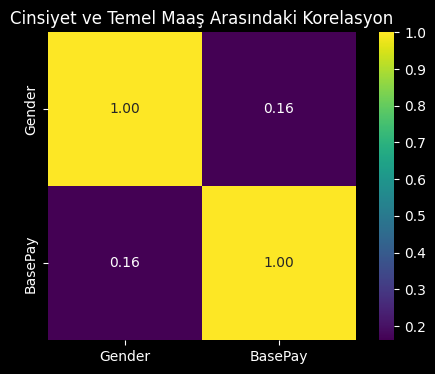

In [ ]:
# Korelasyon matrisini oluşturma
correlation_matrix = dataset_replaced[['Gender', 'BasePay']].corr()

# Isı haritasını oluşturma
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", square=True)
plt.style.use('dark_background')
plt.title('Cinsiyet ve Temel Maaş Arasındaki Korelasyon')
plt.show()

❗ Cinsiyet ve Temel Maaş arasında zayıf pozitif bir ilişki olduğunu görülmektedir. Bu, cinsiyet değiştikçe maaşta küçük bir artış veya azalma olabileceği anlamına gelir.Yani, cinsiyetin temel maaş üzerindeki etkisi sınırlı kalmaktadır.

##**MAKİNE ÖĞRENMESİ ALGORİTMALARI İLE MODELLEME** 📈

# **Total Maaş**

In [ ]:
dataset_total_pay = dataset_replaced.copy() # Orijinal DataFrame'i değiştirmekten kaçınmak için bir kopya oluşturma
dataset_total_pay['TotalPay'] = dataset_replaced['BasePay'] + dataset_replaced['Bonus'] # Toplam maaş sütununun eklenmesi

In [ ]:
X_total = dataset_total_pay.drop(['TotalPay','BasePay', 'Bonus'], axis=1)
y_total = dataset_total_pay['TotalPay']

In [ ]:
# Veriyi eğitim ve test setlerine ayırma
X_train_total, X_test_total, y_train_total, y_test_total = train_test_split(X_total, y_total, test_size=0.2, random_state=42)

## **Lineer Regresyon**

In [ ]:
# Verileri ölçeklendirme (isteğe bağlı)
scaler_total = StandardScaler()
X_train_total = scaler_total.fit_transform(X_train_total)
X_test_total = scaler_total.transform(X_test_total)

# Doğrusal Regresyon modelini oluşturma ve eğitme
model_total_linear = LinearRegression()
model_total_linear.fit(X_train_total, y_train_total)

# Tahminler yapma
y_pred_total_linear = model_total_linear.predict(X_test_total)

# Modelin performansını değerlendirme
mse_total_linear = mean_squared_error(y_test_total, y_pred_total_linear)
r2_total_linear = r2_score(y_test_total, y_pred_total_linear)

print("\nToplam Maaş - Doğrusal Regresyon:")
print(f"Mean Squared Error: {mse_total_linear}")
print(f"R-squared: {r2_total_linear}")


Toplam Maaş - Doğrusal Regresyon:
Mean Squared Error: 223389583.2588517
R-squared: 0.6439230358856914


## **Random Forest**

In [ ]:
model_total_pay_rf = RandomForestRegressor(random_state=42)
model_total_pay_rf.fit(X_train_total, y_train_total)
y_pred_total_pay_rf = model_total_pay_rf.predict(X_test_total)

mse_total_pay_rf = mean_squared_error(y_test_total, y_pred_total_pay_rf)
r2_total_pay_rf = r2_score(y_test_total, y_pred_total_pay_rf)

print("\nToplam Maaş - Random Forest:")
print(f"Mean Squared Error: {mse_total_pay_rf}")
print(f"R-squared: {r2_total_pay_rf}")


Toplam Maaş - Random Forest:
Mean Squared Error: 143131909.44151032
R-squared: 0.7718516009640408


## **XGBoost**

In [ ]:
# XGBoost modelini oluşturma ve eğitme
model_total_pay_xgb = xgb.XGBRegressor()
model_total_pay_xgb.fit(X_train_total, y_train_total)

# Tahminler yapma
y_pred_total_pay_xgb = model_total_pay_xgb.predict(X_test_total)

# Modelin performansını değerlendirme
mse_total_pay_xgb = mean_squared_error(y_test_total, y_pred_total_pay_xgb)
r2_total_pay_xgb = r2_score(y_test_total, y_pred_total_pay_xgb)

print("\nToplam Maaş - XGBoost:")
print(f"Mean Squared Error: {mse_total_pay_xgb}")
print(f"R-squared: {r2_total_pay_xgb}")


Toplam Maaş - XGBoost:
Mean Squared Error: 140776038.01197556
R-squared: 0.7756067964133305


## **LightGBM**

In [ ]:
model_total_pay_lgbm = lgb.LGBMRegressor(force_col_wise=True , verbose=-1 )  # verbose= -1 bilgi mesajı veya ilerleme raporunu kapatmak için kullanıldı.
model_total_pay_lgbm.fit(X_train_total, y_train_total)

# Tahminler yapma
y_pred_total_pay_lgbm = model_total_pay_lgbm.predict(X_test_total)

# Modelin performansını değerlendirme
mse_total_pay_lgbm = mean_squared_error(y_test_total, y_pred_total_pay_lgbm)
r2_total_pay_lgbm = r2_score(y_test_total, y_pred_total_pay_lgbm)

print("\nToplam Maaş - LightGBM:")
print(f"Mean Squared Error: {mse_total_pay_lgbm}")
print(f"R-squared: {r2_total_pay_lgbm}")


Toplam Maaş - LightGBM:
Mean Squared Error: 118735069.16479774
R-squared: 0.8107395056415265


## **SVR**

In [ ]:
# SVR modelini oluşturma ve eğitme
model_total_pay_svr = SVR()
model_total_pay_svr.fit(X_train_total, y_train_total)

# Tahminlerde bulunma
y_pred_total_pay_svr = model_total_pay_svr.predict(X_test_total)

# Modeli değerlendirme
mse_total_pay_svr = mean_squared_error(y_test_total, y_pred_total_pay_svr)
r2_total_pay_svr = r2_score(y_test_total, y_pred_total_pay_svr)

print("\nToplam Maaş - Destek Vektörleri:")
print(f"Mean Squared Error: {mse_total_pay_svr}")
print(f"R-squared: {r2_total_pay_svr}")


Toplam Maaş - Destek Vektörleri:
Mean Squared Error: 626451976.1801751
R-squared: 0.001452464400857223


## **Ridge**

In [ ]:
# Ridge Regresyon modelini oluşturma ve eğitme
model_total_pay_ridge = Ridge(alpha=1.0)  #alpha, düzenlileştirme parametresidir.
model_total_pay_ridge.fit(X_train_total, y_train_total)

# Tahminlerde bulunma
y_pred_total_pay_ridge = model_total_pay_ridge.predict(X_test_total)

# Modeli değerlendirme
mse_total_pay_ridge = mean_squared_error(y_test_total, y_pred_total_pay_ridge)
r2_total_pay_ridge = r2_score(y_test_total, y_pred_total_pay_ridge)

print("\nToplam Maaş - Ridge Regression:")
print(f"Mean Squared Error: {mse_total_pay_ridge}")
print(f"R-squared: {r2_total_pay_ridge}")


Toplam Maaş - Ridge Regression:
Mean Squared Error: 223462494.472206
R-squared: 0.643806817380234


## **Lasso**

In [ ]:
# Lasso Regresyon modelini oluşturma ve eğitme
model_total_pay_lasso = Lasso(alpha=1.0)  #alpha, düzenlileştirme parametresidir
model_total_pay_lasso.fit(X_train_total, y_train_total)

# Modeli kullanarak tahmin yapma
y_pred_total_pay_lasso = model_total_pay_lasso.predict(X_test_total)

# Modeli değerlendirme
mse_total_pay_lasso = mean_squared_error(y_test_total, y_pred_total_pay_lasso)
r2_total_pay_lasso = r2_score(y_test_total, y_pred_total_pay_lasso)

print("\nToplam Maaş - Lasso Regression:")
print(f"Mean Squared Error: {mse_total_pay_lasso}")
print(f"R-squared: {r2_total_pay_lasso}")


Toplam Maaş - Lasso Regression:
Mean Squared Error: 223400419.56267816
R-squared: 0.6439057631099763


## **Gradient Boosting Regressor**

In [ ]:
# Gradient Boosting Regressor modelini oluşturma ve eğitme
model_total_pay_gbr = GradientBoostingRegressor(random_state=42)
model_total_pay_gbr.fit(X_train_total, y_train_total)

# Tahminler yapma
y_pred_total_pay_gbr = model_total_pay_gbr.predict(X_test_total)

# Modelin performansını değerlendirme
mse_total_pay_gbr = mean_squared_error(y_test_total, y_pred_total_pay_gbr)
r2_total_pay_gbr = r2_score(y_test_total, y_pred_total_pay_gbr)

print("\nToplam Maaş - Gradient Boosting Regressor:")
print(f"Mean Squared Error: {mse_total_pay_gbr}")
print(f"R-squared: {r2_total_pay_gbr}")



Toplam Maaş - Gradient Boosting Regressor:
Mean Squared Error: 111192910.14684056
R-squared: 0.8227615034751035


## **CatBoost**

In [ ]:
# CatBoost modelini oluşturma ve eğitme
model_total_pay_catboost = CatBoostRegressor(verbose=0)  # verbose=0, eğitim süreci hakkında bilgi göstermez
model_total_pay_catboost.fit(X_train_total, y_train_total)

# Tahminler yapma
y_pred_total_pay_catboost = model_total_pay_catboost.predict(X_test_total)

# Modelin performansını değerlendirme
mse_total_pay_catboost = mean_squared_error(y_test_total, y_pred_total_pay_catboost)
r2_total_pay_catboost = r2_score(y_test_total, y_pred_total_pay_catboost)

print("\nToplam Maaş - CatBoost:")
print(f"Mean Squared Error: {mse_total_pay_catboost}")
print(f"R-squared: {r2_total_pay_catboost}")


Toplam Maaş - CatBoost:
Mean Squared Error: 117605577.6883371
R-squared: 0.8125398845583226


## **Model Performans Değerlendirmesi**

In [ ]:
def evaluate_total_salary_models():

    model_performance_total_pay = pd.DataFrame({
        'Model': ['Linear Regression', 'Random Forest', 'XGBoost', 'LightGBM', 'SVR', 'Ridge', 'Lasso', 'GradientBoostingRegressor', 'CatBoost'],
        'MSE': [mse_total_linear, mse_total_pay_rf, mse_total_pay_xgb, mse_total_pay_lgbm, mse_total_pay_svr, mse_total_pay_ridge, mse_total_pay_lasso, mse_total_pay_gbr, mse_total_pay_catboost],
        'R-squared': [r2_total_linear, r2_total_pay_rf, r2_total_pay_xgb, r2_total_pay_lgbm, r2_total_pay_svr, r2_total_pay_ridge, r2_total_pay_lasso, r2_total_pay_gbr, r2_total_pay_catboost]
    })

     # En yüksek R-squared değerine sahip modeli bulma
    best_model_total_pay = model_performance_total_pay.loc[model_performance_total_pay['R-squared'].idxmax()]

     # Model performans karşılaştırması ve en iyi modeli yazdırma
    print("\nToplam Maaş Modeli Performans Karşılaştırması:")
    print(model_performance_total_pay)
    print(f"\nEn iyi Model (Toplam Maaş): {best_model_total_pay['Model']}")


evaluate_total_salary_models()


Toplam Maaş Modeli Performans Karşılaştırması:
                       Model            MSE  R-squared
0          Linear Regression 223,389,583.26       0.64
1              Random Forest 143,131,909.44       0.77
2                    XGBoost 140,776,038.01       0.78
3                   LightGBM 118,735,069.16       0.81
4                        SVR 626,451,976.18       0.00
5                      Ridge 223,462,494.47       0.64
6                      Lasso 223,400,419.56       0.64
7  GradientBoostingRegressor 111,192,910.15       0.82
8                   CatBoost 117,605,577.69       0.81

En iyi Model (Toplam Maaş): GradientBoostingRegressor


## **Over ve Under Fitting Kontrolü**

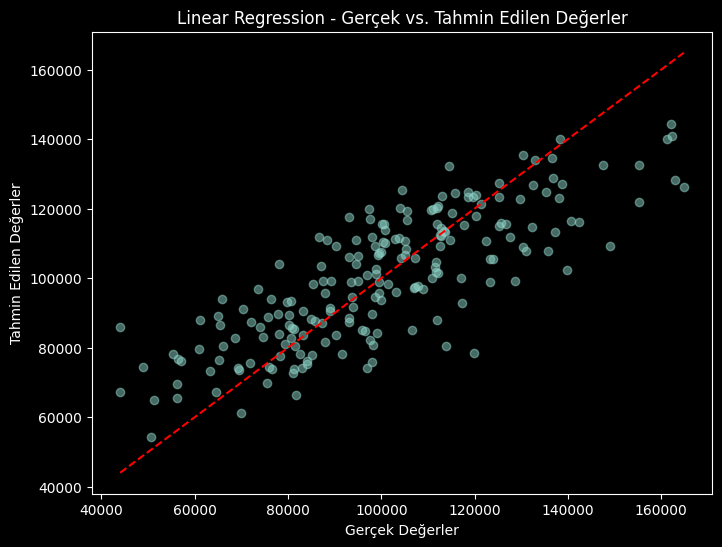

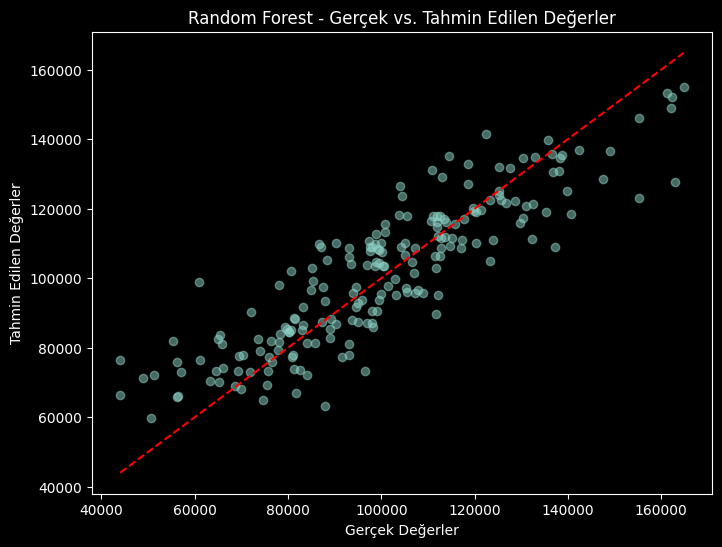

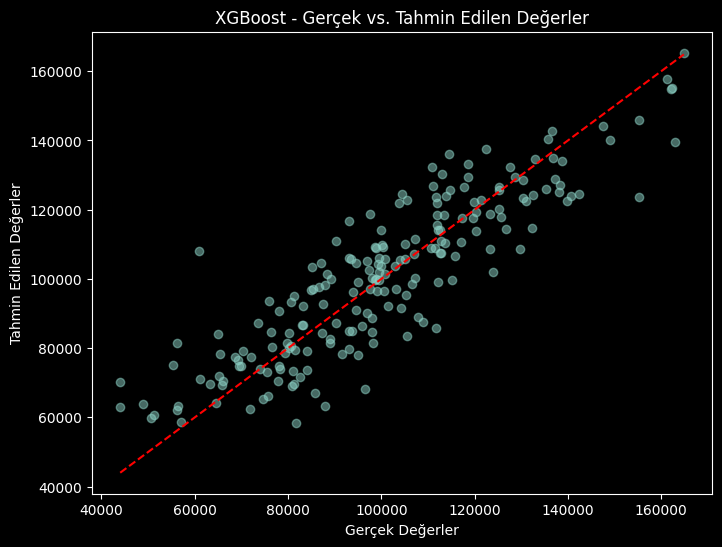

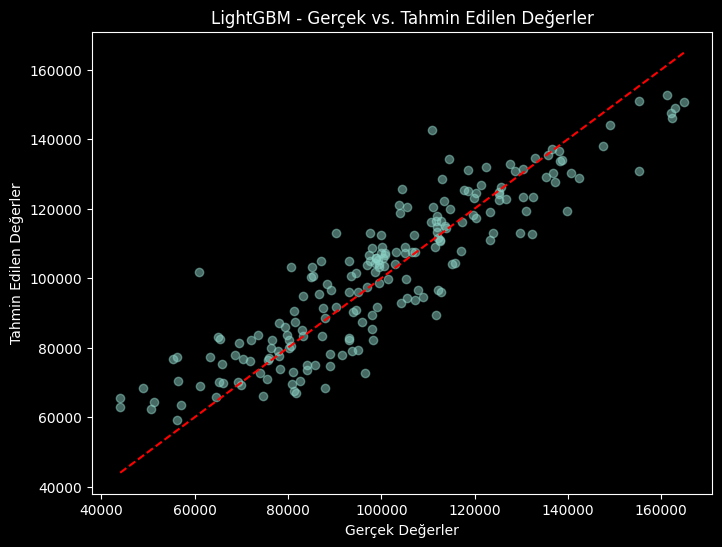

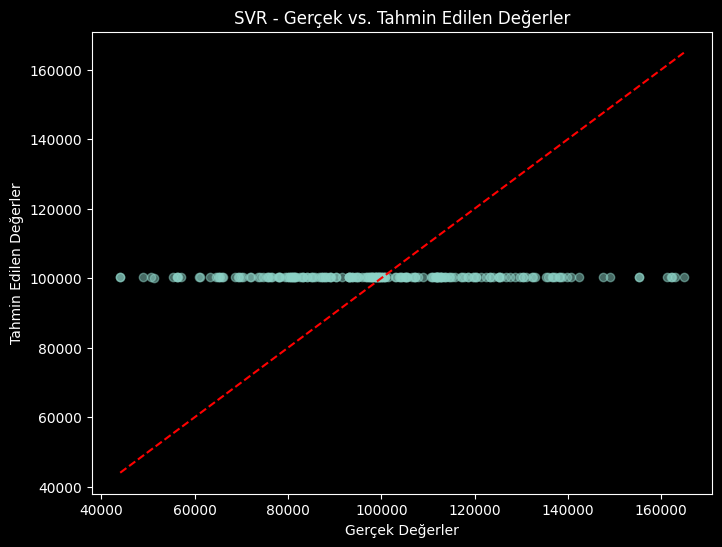

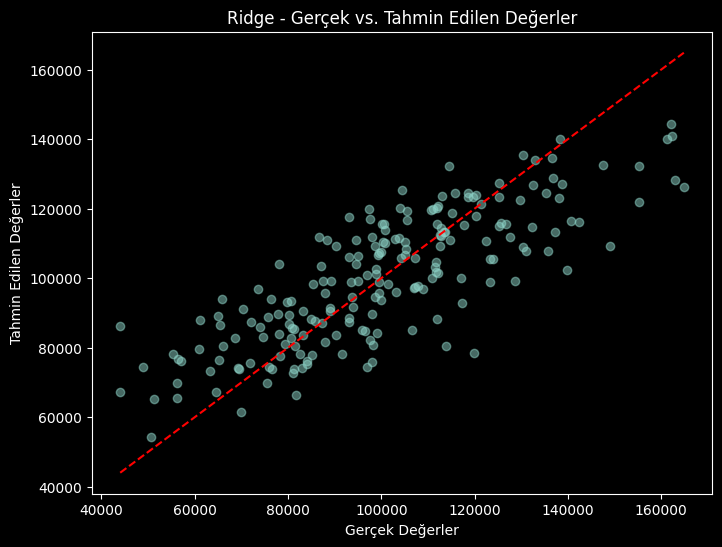

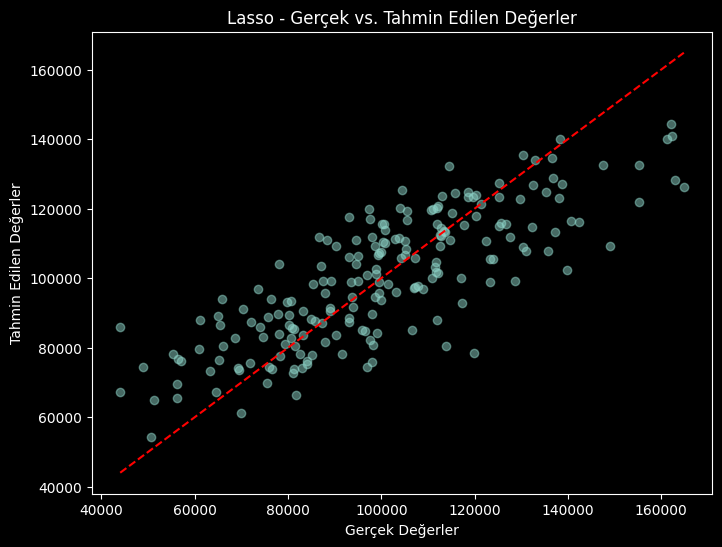

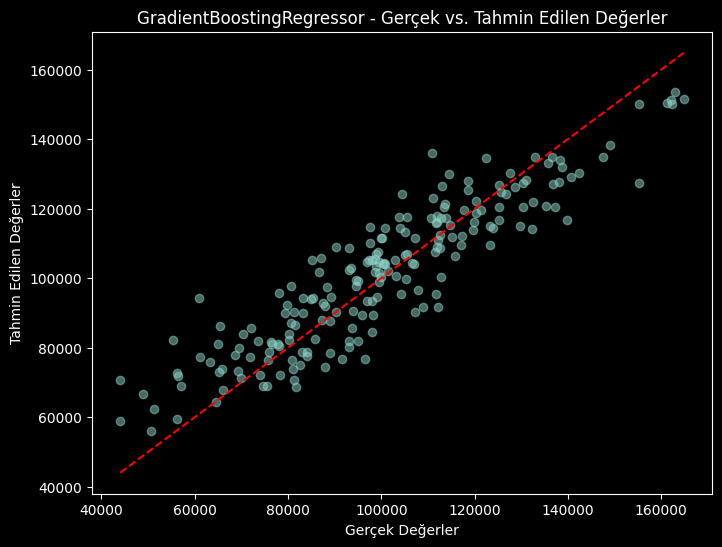

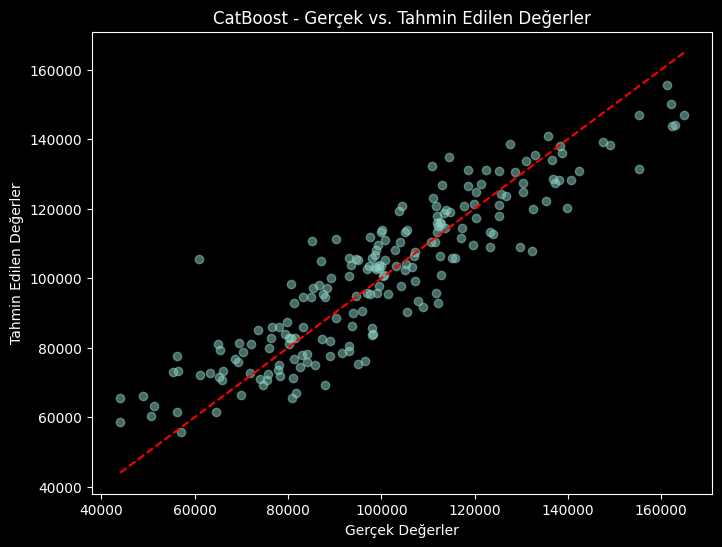

In [ ]:
def plot_predictions_vs_actual(y_true, y_pred, model_name):
    """Belirli bir model için tahmin edilen değerlerle gerçek değerleri grafik üzerinde karşılaştırma."""
    plt.style.use('dark_background')
    plt.figure(figsize=(8, 6))
    plt.scatter(y_true, y_pred, alpha=0.5)
    plt.xlabel("Gerçek Değerler")
    plt.ylabel("Tahmin Edilen Değerler")
    plt.title(f"{model_name} - Gerçek vs. Tahmin Edilen Değerler")
    plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], color='red', linestyle='--')  # Eşitlik çizgisi
    plt.show()


# tüm modeller için döngü
models_to_plot = {
    "Linear Regression": (y_test_total, y_pred_total_linear),
    "Random Forest": (y_test_total, y_pred_total_pay_rf),
    "XGBoost": (y_test_total, y_pred_total_pay_xgb),
    "LightGBM": (y_test_total, y_pred_total_pay_lgbm),
    "SVR": (y_test_total, y_pred_total_pay_svr),
    "Ridge": (y_test_total, y_pred_total_pay_ridge),
    "Lasso": (y_test_total, y_pred_total_pay_lasso),
    "GradientBoostingRegressor": (y_test_total, y_pred_total_pay_gbr),
    "CatBoost": (y_test_total, y_pred_total_pay_catboost),
}

for model_name, (y_true, y_pred) in models_to_plot.items():
    plot_predictions_vs_actual(y_true, y_pred, model_name)

## **En iyi Model İçin Hiperparametre Optimizasyonu**

In [ ]:
# Gradient Boosting Regressor için parametre ızgarasını tanımlama
param_grid_gbr = {
    'n_estimators': [100, 200, 300],    # Boosting aşamalarının sayısı
    'learning_rate': [0.01, 0.1, 0.2],  # Adım boyutu küçültme
    'max_depth': [3, 5, 7],             # Bireysel regresyon tahmin edicilerinin maksimum derinliği
    'min_samples_split': [2, 5, 10],    # Bir iç düğümü bölmek için gereken minimum örnek sayısı
    'min_samples_leaf': [1, 2, 4]       # Bir yaprak düğümünde bulunması gereken minimum örnek sayısı
}

# Bir GradientBoostingRegressor modeli oluşturma
model_total_pay_gbr = GradientBoostingRegressor(random_state=42)

# Bir GridSearchCV nesnesi oluşturma
grid_search_gbr = GridSearchCV(estimator=model_total_pay_gbr, param_grid=param_grid_gbr, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Izgara aramasını eğitim verilerine uygulama
grid_search_gbr.fit(X_train_total, y_train_total)

# En iyi hiperparametreleri ve en iyi modeli alma
best_params_gbr = grid_search_gbr.best_params_
best_model_gbr = grid_search_gbr.best_estimator_
# En iyi modeli değerlendirme
y_pred_best_gbr = best_model_gbr.predict(X_test_total)
mse_best_gbr = mean_squared_error(y_test_total, y_pred_best_gbr)
r2_best_gbr = r2_score(y_test_total, y_pred_best_gbr)


print("\nToplam Maaş - Gradient Boosting Regressor (Optimized):")
print(f"Mean Squared Error: {mse_best_gbr}")
print(f"R-squared: {r2_best_gbr}")
print(f"Best Hyperparameters: {best_params_gbr}")


Toplam Maaş - Gradient Boosting Regressor (Optimized):
Mean Squared Error: 111305718.61604348
R-squared: 0.8225816898210638
Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}


## **GBR  Adalet ve Bias Testi**

In [ ]:
# Verileri eğitme ve test kümelerine ayırma
X_train_total, X_test_total, y_train_total, y_test_total = train_test_split(X_total, y_total, test_size=0.2, random_state=42)


# Önceki optimizasyondan elde edilen en iyi hiperparametreleri kullanma
best_params_gbr = {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}

# En iyi hiperparametrelerle bir GradientBoostingRegressor modeli oluşturma ve eğitme
model_total_pay_gbr = GradientBoostingRegressor(**best_params_gbr, random_state=42)
model_total_pay_gbr.fit(X_train_total, y_train_total)

# Test kümesi üzerinde tahminlerde bulunma
y_pred_total_pay_gbr = model_total_pay_gbr.predict(X_test_total)


# Modeli değerlendirme
mse_total_pay_gbr = mean_squared_error(y_test_total, y_pred_total_pay_gbr)
r2_total_pay_gbr = r2_score(y_test_total, y_pred_total_pay_gbr)

print("\nToplam Maaş - Gradient Boosting Regressor (Bias Test with Best Parameters):")
print(f"Mean Squared Error: {mse_total_pay_gbr}")
print(f"R-squared: {r2_total_pay_gbr}")


# "Cinsiyete göre önyargı testi (örnek - diğer hassas nitelikler için uyum)"
# 'Gender' sütununun X_test_total içinde olduğunu varsayalım.
# Gerekirse, bu sütunu önceden işlemeniz gerekebilir (örneğin, tek sıcak kodlama).


for gender_val in X_test_total['Gender'].unique():
    gender_subset = X_test_total[X_test_total['Gender'] == gender_val]
    y_true_subset = y_test_total[X_test_total['Gender'] == gender_val]
    y_pred_subset = model_total_pay_gbr.predict(gender_subset)

    mse_subset = mean_squared_error(y_true_subset, y_pred_subset)
    r2_subset = r2_score(y_true_subset, y_pred_subset)

    print(f"\nGender Value: {gender_val}")
    print(f"Mean Squared Error: {mse_subset}")
    print(f"R-squared: {r2_subset}")


Toplam Maaş - Gradient Boosting Regressor (Bias Test with Best Parameters):
Mean Squared Error: 111305718.61604348
R-squared: 0.8225816898210638

Gender Value: 1
Mean Squared Error: 99018591.63524303
R-squared: 0.8447937100564278

Gender Value: 0
Mean Squared Error: 126323318.25924397
R-squared: 0.7811038859025787


Bias Yorumu:

Erkek çalışanlar için modelin daha düşük bir MSE ve daha yüksek bir R-kare değerine sahip olduğunu görüyoruz. Bu, modelin erkek çalışanların toplam maaşını kadın çalışanlara göre daha doğru tahmin ettiği anlamına gelir. Kadın çalışanlar için daha yüksek MSE ve daha düşük R-kare değeri, modelin bu grup için daha az doğru tahminler ürettiğini ve bir miktar önyargıya sahip olabileceğini düşündürür.

Ek Bilgiler:

Bias'ı azaltmak için veri setini dengeleme, farklı algoritmalar deneme veya modelin hiperparametrelerini ayarlama gibi yöntemler kullanılabilir.
Bias'ın kaynağını ve etkisini daha iyi anlamak için daha fazla analiz yapmak faydalı olabilir.

# **Cinsiyetler Arası Temel Maaş farkı var mı ?**

### **Lojistik Regresyon - Maaş Farkının Belirli Bir Eşiğin Üstünde Olup Olmadığına karar verme**

In [ ]:
# 1. Veri kümesinin bir kopyasını oluşturma:
dataset_logistic = dataset_replaced.copy()

# 2. Maaş sınırını belirleme:
threshold = dataset_logistic['BasePay'].median()

# 3.  İkili bir hedef değişken oluşturma:
dataset_logistic['HighSalary'] = (dataset_logistic['BasePay'] > threshold).astype(int)

# 4. Özellikleri ve hedefi seçme:
X = dataset_logistic[['Gender', 'Age', 'PerfEval', 'Education', 'Dept', 'Seniority']]
y = dataset_logistic['HighSalary']

# 5. Verileri eğitme ve test kümelerine ayırma:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Lojistik Regresyon modelini oluşturma ve eğitme:
model = LogisticRegression()
model.fit(X_train, y_train)

# 7. Tahminlerde bulunma:
y_pred = model.predict(X_test)

# 8. Modeli değerlendirme:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

Accuracy: 0.825
              precision    recall  f1-score   support

           0       0.84      0.81      0.83       102
           1       0.81      0.84      0.82        98

    accuracy                           0.82       200
   macro avg       0.83      0.83      0.82       200
weighted avg       0.83      0.82      0.83       200



* Doğruluk:
  Doğruluk skoru (0.82), modelin tahminlerinin genel
  doğruluğunu temsil eder. Bu durumda, model test setindeki çalışanların %82'inin maaş kategorisini (Yüksek veya Düşük) doğru bir şekilde tahmin etmiştir.

* Kesinlik (Precision):
0 sınıfı (Düşük Maaş): Model, düşük maaşlı olarak tahmin ettiği kişilerin %84'ünü doğru bir şekilde sınıflandırdı.
1 sınıfı (Yüksek Maaş): Model, yüksek maaşlı olarak tahmin ettiği kişilerin %81'ini doğru bir şekilde sınıflandırdı.

* F1 Skoru : 0 sınıfı (Düşük Maaş): Gerçekte düşük maaşlı olan kişilerin %81'i model tarafından doğru bir şekilde tespit edildi.
1 sınıfı (Yüksek Maaş): Gerçekte yüksek maaşlı olan kişilerin %84'ü model tarafından doğru bir şekilde tespit edildi.

* Destek (Support):
0 sınıfı (Düşük Maaş): Test verilerinde 102 düşük maaşlı kişi vardı.
1 sınıfı (Yüksek Maaş): Test verilerinde 98 yüksek maaşlı kişi vardı.

❗ Sonuç olarak model, her iki sınıfı da (düşük ve yüksek maaş) iyi tahmin ediyor. Kesinlik ve duyarlılık değerleri dengeli; bu da modelin performansının sağlam olduğunu gösterir.

### **Cinsiyet Değişkeninin Katsayısını İnceleme**


In [ ]:
coefficients = model.coef_

# 'Gender' özelliğinin X veri kümenizdeki ilk özellik olduğunu varsayalım.
gender_coefficient = coefficients[0][X_train.columns.get_loc('Gender')]

print(f"Gender Coefficient: {gender_coefficient}")

if gender_coefficient > 0:
    print("Erkek çalışanların yüksek maaşlı olma olasılığı daha yüksektir.")
elif gender_coefficient < 0:
    print("Kadın çalışanların yüksek maaşlı olma olasılığı daha yüksektir.")
else:
    print("Cinsiyetin maaş üzerinde istatistiksel olarak anlamlı bir etkisi yoktur.")

print(f"Coefficient magnitude: {abs(gender_coefficient)}")

Gender Coefficient: 1.0342448660992603
Erkek çalışanların yüksek maaşlı olma olasılığı daha yüksektir.
Coefficient magnitude: 1.0342448660992603


Lojistik regresyon modelinde "Gender" değişkeni genellikle Kadın ve Erkek kategorilerini 0 ve 1 ile temsil eder.

* Pozitif katsayı: 1 (Erkek) kodlanan grubun daha yüksek maaş olasılığına sahip olduğunu gösterir.
* Negatif katsayı: 0 (Kadın) kodlanan grubun daha yüksek maaş olasılığına sahip olduğunu gösterir.

❗ Burada cinsiyet katsayısı 1.034 olup, pozitif bir değer taşır, yani erkeklerin yüksek maaş alma olasılığı daha fazladır. Katsayının büyüklüğü, cinsiyetin maaş üzerindeki etkisini gösterir; büyüdükçe etkisi daha belirgin olur.


### **Varyans Analizi (ANOVA)**

ANOVA, birden fazla grubun ortalamaları arasında istatistiksel olarak anlamlı bir fark olup olmadığını test eden bir yöntemdir.


In [ ]:
# ANOVA modelinin formülü: Temel Maaş ~ Cinsiyet (kategorik değişken olarak cinsiyet)
formula = 'BasePay ~ C(Gender)'

# statsmodels kütüphanesi kullanılarak model oluşturulması ve eğitilmesi.
model = sm.ols(formula, data=dataset_replaced).fit()

# ANOVA testi gerçekleştirilir.
anova_table = anova_lm(model, typ=2)
# ANOVA testi gerçekleştirilir.

print(anova_table)


                      sum_sq     df     F  PR(>F)
C(Gender)  16,175,532,485.67   1.00 26.64    0.00
Residual  606,065,954,967.31 998.00   NaN     NaN


Çıktıya göre,  çalışanların cinsiyetleri ile maaşları arasında anlamlı bir fark olduğu söylenebilir.

F-test istatistiği 26.64 ve p-değeri 0.00'dır(p < 0.05), bu da cinsiyetin maaş üzerinde istatistiksel olarak anlamlı bir etkisi olduğunu gösterir.

❗ Test bize cinsiyetler arası maaş farkı olup olmadığını söyler ancak bunun ne kadar olduğunu söylememektedir.

# **Sonuç**

* Cinsiyet ile temel maaş arasında zayıf bir pozitif ilişki bulunmuş, cinsiyetin maaş üzerinde doğrudan bir etkisi olmadığı tespit edilmiştir.

* Ağaç tabanlı modeller (Gradient Boosting Regressor ve XGBoost), diğer modellere kıyasla daha iyi performans göstermiştir.

* En düşük MSE ve en yüksek R-kare değerine sahip modeller en iyi performansı göstermiştir.

* Tahmin edilen değerler ile gerçek değerler karşılaştırılmış, overfitting problemi tespit edilmemiştir.

* Gradient Boosting Regressor modelinin performansı GridSearchCV ile yapılan hiperparametre optimizasyonu sayesinde artırılmıştır.

* Cinsiyete dayalı önyargı analizlerinde önemli bir fark tespit edilmemiştir.

❗Sonuç olarak, modeller başarılı tahminler yapmış ve cinsiyet açısından belirgin bir önyargı saptanmamıştır.